# analysis curve AUC_ROC with Bagging and Boosting

In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier

##### This document consists of presenting bagging and boosting techniques and making some comparisons regarding their performance.


1. Bagging (Bootstrap Aggregating), is a method that involves training different predictors in different training sets. In this technique the classifiers are trained independently by different training sets through the initialization method.


2. Boosting: Combining weaker learning with stronger learning. This technique is considered one of the most well-known discoveries in machine learning.

In this experiment the AdaBoost model, "Adaptive Boosting", was also used, it is a combination of Bagging and Boosting ideas and does not require a large set of training like Boosting. That is, this method is able to build several models of machine learning, using the result of each model in the definition of a single result, thus obtaining a single final value. Which means that the aggregated responses from all models are given as the end result for each data that you are testing.

It is worth mentioning that this technique involves a higher computational cost, but that, generally, it presents a good performance.

In [ ]:
df_data=pd.read_csv(r"C:\Users\ana.m.lima\dados\churn.csv")
df_data.head()

In [219]:
df_data.shape

(7043, 21)

In [220]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [221]:
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df_data.columns:
    if df_data[column].dtype == object and column != 'customerID':
        if df_data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_data[column] = le.fit_transform(df_data[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_data = pd.get_dummies(data = df_data,columns = dummy_columns)

In [222]:
all_columns = []
for column in df_data.columns:
    column = column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")
    all_columns.append(column)

df_data.columns = all_columns

In [223]:
glm_columns = 'gender'

for column in df_data.columns:
    if column not in ['Churn','customerID','gender']:
        glm_columns = glm_columns + ' + ' + column

In [224]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,0,...,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,0,...,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,1,...,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,0,...,0,0,0,0,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,1,...,0,0,0,0,0,0,0,0,0,0


In [225]:
X=df_data.drop(['Churn', 'customerID'], axis = 1)
y=df_data['Churn']

In [226]:
X_train, X_test, y_train, y_test = train_test=train_test_split(X,y, stratify=y, shuffle=True, \
                                                              test_size=0.2, random_state=44)

In [227]:
RUS=RandomUnderSampler()
X_train_RUS, y_train_RUS = RUS.fit_sample(X_train, y_train)
y_train_RUS.value_counts()


0    1495
1    1495
Name: Churn, dtype: int64

## Random Forest X DecisionTree

In [228]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(X_train_RUS, y_train_RUS)

RandomForestClassifier(n_estimators=500)

In [229]:
dt=DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_RUS, y_train_RUS)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [230]:
r_probs=[0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

In [231]:
rf_probs = rf_probs[:, 1]
dt_probs = dt_probs [:, 1]

In [232]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc=roc_auc_score(y_test, rf_probs)
dt_auc=roc_auc_score(y_test, dt_probs)

In [233]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.846
Decision Tree: AUROC = 0.849


In [234]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

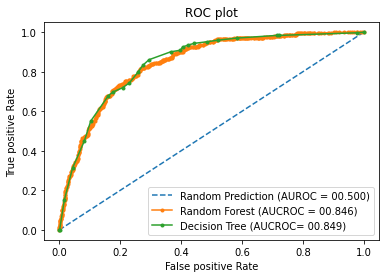

In [235]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = 0%.3F)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUCROC = 0%.3F)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUCROC= 0%.3F)' % dt_auc)

#Title
plt.title('ROC plot')
#Axis Labels
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
#Show legend
plt.legend()
#show plot
plt.show()

In [236]:
print ('RF %.3f:' % rf_auc)
print ('DT %.3f:' % dt_auc)

RF 0.846:
DT 0.849:


## Knn and Naive Bayes

In [237]:
n_neighbors=21

In [238]:
knn=KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_RUS, y_train_RUS)

KNeighborsClassifier(n_neighbors=21)

In [166]:
nb=GaussianNB()
nb.fit(X_train_RUS, y_train_RUS)

GaussianNB()

### Prediction probabilites

In [167]:
r_probs=[0 for _ in range(len(y_test))]
knn_probs = knn.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

Probabilidade para manter o resultado positivo 

In [168]:
knn_probs = knn_probs[:, 1]
nb_probs = nb_probs [:, 1]

## Computing AUROC and ROC curve values

Roc é a caracteristica de operação do receptor AUROC é a área sob curva ROC

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score

In [170]:
r_auc = roc_auc_score(y_test, r_probs)
knn_auc=roc_auc_score(y_test, knn_probs)
nb_auc=roc_auc_score(y_test, nb_probs)

## Print AUROC scores

In [173]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('KNeighborsClassifier: AUROC = %.3f' % (knn_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
KNeighborsClassifier: AUROC = 0.839
Naive Bayes: AUROC = 0.495


 ## Calculando curva de ROC

In [174]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

## Plot the ROC curve 

In [175]:
import matplotlib.pyplot as plt

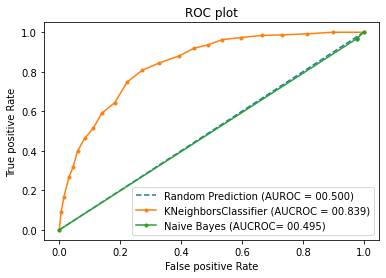

In [176]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = 0%.3F)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighborsClassifier (AUCROC = 0%.3F)' % knn_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUCROC= 0%.3F)' % nb_auc)

#Title
plt.title('ROC plot')
#Axis Labels
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
#Show legend
plt.legend()
#show plot
plt.show()


In [177]:
print ('NB %.3f:' % nb_auc)
print ('KNN %.3f:' % knn_auc)

NB 0.495:
KNN 0.839:


## Adaboost with Logistic Regression and GradientBoost

In [178]:
clf2=LogisticRegression(random_state=44, max_iter=500)
ada_clf2=AdaBoostClassifier(clf2, n_estimators=200, learning_rate=0.01)
ada_clf2.fit(X_train_RUS, y_train_RUS)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=500,
                                                     random_state=44),
                   learning_rate=0.01, n_estimators=200)

In [179]:
from xgboost import XGBClassifier
gb_clf = XGBClassifier(learning_rate = 0.1, n_estimators = 50, 
                    max_depth= 1,min_child_weight = 1)
gb_clf.fit(X_train_RUS, y_train_RUS)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [180]:
r_probs=[0 for _ in range(len(y_test))]
ada_clf2_probs = ada_clf2.predict_proba(X_test)
gb_clf_probs = gb_clf.predict_proba(X_test)

In [181]:
ada_clf2_probs = ada_clf2_probs[:, 1]
gb_clf_probs = gb_clf_probs [:, 1]

In [182]:
r_auc = roc_auc_score(y_test, r_probs)
ada_clf2_auc=roc_auc_score(y_test, ada_clf2_probs)
gb_clf_auc=roc_auc_score(y_test, gb_clf_probs)

In [183]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('AdaBoost: AUROC = %.3f' % (ada_clf2_auc))
print('GradientBoost: AUROC = %.3f' % (gb_clf_auc))

Random (chance) Prediction: AUROC = 0.500
AdaBoost: AUROC = 0.844
GradientBoost: AUROC = 0.860


In [184]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
ada_clf2_fpr, ada_clf2_tpr, _ = roc_curve(y_test, ada_clf2_probs)
gb_clf_fpr, gb_clf_tpr, _ = roc_curve(y_test, gb_clf_probs)

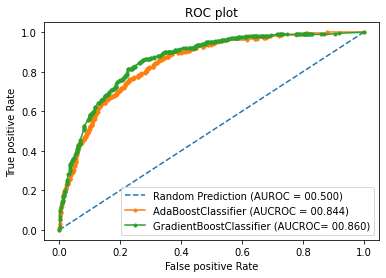

In [185]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = 0%.3F)' % r_auc)
plt.plot(ada_clf2_fpr, ada_clf2_tpr, marker='.', label='AdaBoostClassifier (AUCROC = 0%.3F)' % ada_clf2_auc)
plt.plot(gb_clf_fpr, gb_clf_tpr, marker='.', label='GradientBoostClassifier (AUCROC= 0%.3F)' % gb_clf_auc)

#Title
plt.title('ROC plot')
#Axis Labels
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
#Show legend
plt.legend()
#show plot
plt.show()

In [186]:
print ('Ada %.3f:' % ada_clf2_auc)
print ('XGB %.3f:' % gb_clf_auc)

Ada 0.844:
XGB 0.860:


## Catboost and GradientBoost 

In [187]:
gb_clf1 = XGBClassifier(learning_rate = 0.1, n_estimators = 50, 
                    max_depth= 1,min_child_weight = 1)
gb_clf1.fit(X_train_RUS, y_train_RUS)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [188]:
cat = CatBoostClassifier(iterations=20, learning_rate=0.01, depth=4)
cat.fit(X_train_RUS, y_train_RUS)

0:	learn: 0.6888719	total: 9.92ms	remaining: 189ms
1:	learn: 0.6848965	total: 22.1ms	remaining: 199ms
2:	learn: 0.6808240	total: 35.8ms	remaining: 203ms
3:	learn: 0.6771460	total: 45.5ms	remaining: 182ms
4:	learn: 0.6735568	total: 54.8ms	remaining: 164ms
5:	learn: 0.6702190	total: 64.7ms	remaining: 151ms
6:	learn: 0.6670271	total: 74.8ms	remaining: 139ms
7:	learn: 0.6636178	total: 82.8ms	remaining: 124ms
8:	learn: 0.6601975	total: 91.5ms	remaining: 112ms
9:	learn: 0.6571373	total: 99.6ms	remaining: 99.6ms
10:	learn: 0.6541763	total: 108ms	remaining: 88ms
11:	learn: 0.6515313	total: 115ms	remaining: 76.9ms
12:	learn: 0.6489300	total: 124ms	remaining: 66.6ms
13:	learn: 0.6461944	total: 132ms	remaining: 56.6ms
14:	learn: 0.6433993	total: 141ms	remaining: 46.9ms
15:	learn: 0.6404728	total: 149ms	remaining: 37.2ms
16:	learn: 0.6376702	total: 160ms	remaining: 28.3ms
17:	learn: 0.6348917	total: 171ms	remaining: 19ms
18:	learn: 0.6323990	total: 179ms	remaining: 9.42ms
19:	learn: 0.6298848	tota

In [189]:
r_probs=[0 for _ in range(len(y_test))]
gb_clf1_probs = gb_clf1.predict_proba(X_test)
cat_probs = cat.predict_proba(X_test)

In [190]:
gb_clf1_probs = gb_clf1_probs[:, 1]
cat_probs = cat_probs [:, 1]

In [191]:
r_auc = roc_auc_score(y_test, r_probs)
gb_clf1_auc=roc_auc_score(y_test, gb_clf1_probs)
cat_auc=roc_auc_score(y_test, cat_probs)

In [192]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('AdaBoost: AUROC = %.3f' % (gb_clf1_auc))
print('GradientBoost: AUROC = %.3f' % (cat_auc))

Random (chance) Prediction: AUROC = 0.500
AdaBoost: AUROC = 0.860
GradientBoost: AUROC = 0.851


In [193]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
gb_clf1_fpr, gb_clf1_tpr, _ = roc_curve(y_test, gb_clf1_probs)
cat_fpr, cat_tpr, _ = roc_curve(y_test, cat_probs)

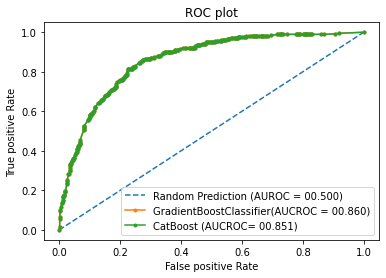

In [194]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = 0%.3F)' % r_auc)
plt.plot(gb_clf1_fpr, gb_clf1_tpr, marker='.', label='GradientBoostClassifier(AUCROC = 0%.3F)' % gb_clf1_auc)
plt.plot(gb_clf_fpr, gb_clf_tpr, marker='.', label='CatBoost (AUCROC= 0%.3F)' % cat_auc)

#Title
plt.title('ROC plot')
#Axis Labels
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
#Show legend
plt.legend()
#show plot
plt.show()

In [195]:
print ('XGB %.3f:' % gb_clf1_auc)
print ('CAT %.3f:' % cat_auc)

XGB 0.860:
CAT 0.851:
